<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>


# Laboratorio 1
Exploración de datos

En este laboratorio realizaremos un trabajo de exploración sobre un dataset dado. Hemos tomado como inspiración el siguiente kernel de Kaggle: We are from our childhood. El conjunto de datos utilizado son las respuestas de gente joven a una encuesta, con la que les proponemos trabajar. En esta notebook en particular, la autora visualiza distintos aspectos de los datos tratando de encontrar factores de variación relacionados a la respuesta “Crecí en la ciudad” o “Crecí en el campo”. La consigna para este laboratorio es realizar un trabajo similar, aunque más simple, analizando algunas de las variables provistas por la encuesta.
Pueden utilizar otro dataset, previamente aprobado por las docentes. Si eligen esta opción, en el informe describir el dataset o los aspectos relevantes del mismo que se utilizarán durante el laboratorio. Es importante especificar por qué seleccionaron esos datos y qué tipo de información esperan extraer.
Entrega
En el repositorio de su grupo deben subir una notebook (recomendamos usar jupyter) con el código y las visualizaciones utilizadas para extraer la información que les pedimos a continuación. Si la notebook no la presentan en un github, suban también un archivo html para que podamos ver las imágenes sin necesidad de ejecutar el código. Recuerden que entre las celdas de código puede agregar markdown y latex para explicar las hipótesis que plantean y conclusiones que obtienen.
El informe sólo es necesario para aclarar decisiones de diseño que hayan tomado, librerías extras utilizadas, etc.
Implementación
Se deberá presentar al menos la siguiente información
Estadísticas descriptivas
Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?
Realizar un análisis de outliers.
Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.
Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.
Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?
Se evaluarán los siguientes aspectos:
Estructura legible de la notebook.
Los tipos de gráficos son adecuados para la información representada
Otros datasets para inspirarse
En el portal de datos abiertos de Argentina pueden encontrar datasets, la mayoría de ellos sobre agricultura. En particular encontramos datos sobre femicidios en Argentina, similar al que trabajaremos en clase de violencia institucional.
En GapMinder existe una colección de datasets que describen World wide wellfare variables.
En el github Fivethirtyeight datasets hay una colección de datos utilizados para crear reportes periodísticos con alto contenido de estadística. Entre los destacados: 
Comic characters.
Fandango.
Nutrition
Star wars
En Kaggle también existen muchas opciones de datasets y código para trabajarlos.


<H4>Ejercicio 1: Estadísticas descriptivas</H4>
Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

In [13]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

sb.set_style('whitegrid')
sb.set_context('talk')


In [14]:
dataset = pd.read_csv( './Laboratorio_1/responses.csv', encoding='utf8')
dataset[:3]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


In [109]:
sumedad= dataset["Age"].sum()
print("Suma de todas las edades registradas: "+str(sumedad))

Suma de todas las edades registradas: 20495.0


In [111]:
cantedad= dataset["Age"].count()
print("Cantidad de entradas válidas para el campo edad: "+str(cantedad));

Cantidad de entradas válidas para el campo edad: 1003


In [112]:
media=sumedad/cantedad
print("Media muestral de las Edades: "+str(media));

Media muestral de las Edades: 20.43369890329013


In [114]:
calculos = pd.DataFrame({'Edad':[dataset.Age.mode()[0],dataset.Age.mean(),
                                    dataset.Age.median(),dataset.Age.std(),
                                   dataset.Age.min(),dataset.Age.max(),
                                    dataset.Age.var()],
                            'Peso':[dataset.Weight.mode()[0],dataset.Weight.mean(),
                                    dataset.Weight.median(),dataset.Weight.std(),
                                   dataset.Weight.min(),dataset.Weight.max(),
                                    dataset.Weight.var()]},
                           index=['Moda','Media','Mediana','Desviación Estándar',
                                  'Valor Mínimo','Valor Máximo','Varianza'])
print("Ahora que hicimos algunos cálculos por separado, ")
print("usemos las funciones que nos provee pandas para calcualr todo junto.");
display(calculos)

Ahora que hicimos algunos cálculos por separado, 
usemos las funciones que nos provee pandas para calcualr todo junto.


,Edad,Peso
Moda,19.000000,60.000000
Media,20.433699,66.405051
Mediana,20.000000,64.000000
Desviación Estándar,2.828840,13.839561
Valor Mínimo,15.000000,41.000000
Valor Máximo,30.000000,165.000000
Varianza,8.002336,191.533443


Text(0.5,1,'Graficamos los valores calculados en el paso anterior')

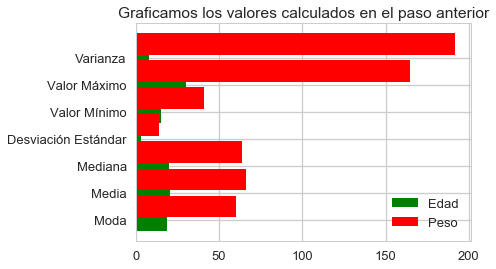

In [116]:
rotulos=("Moda","Media","Mediana","Desviación Estándar","Valor Mínimo","Valor Máximo","Varianza")
plt.barh(posicion_y,calculos["Edad"], color = "g", label= "Edad")
posicion_y = np.arange(len(rotulos))
plt.barh(posicion_y+0.5,calculos["Peso"], color ="r", label= "Peso")
plt.yticks(posicion_y, rotulos)
plt.legend()
plt.title("Graficamos los valores calculados en el paso anterior")

In [28]:
tabla_edades = np.arange(0,51.,1)
f_edad = pd.cut(dataset['Age'],tabla_edades)
tabla_f_edad = pd.value_counts(f_edad)
print("\nDistribución de Frecuencias por Rango de Edad:")
tabla_f_edad


Distribución de Frecuencias por Rango de Edad:


(18.0, 19.0]    210
(19.0, 20.0]    194
(20.0, 21.0]    127
(17.0, 18.0]    123
(21.0, 22.0]     84
(16.0, 17.0]     53
(22.0, 23.0]     47
(24.0, 25.0]     30
(15.0, 16.0]     29
(23.0, 24.0]     28
(27.0, 28.0]     17
(25.0, 26.0]     15
(26.0, 27.0]     14
(14.0, 15.0]     11
(28.0, 29.0]     11
(29.0, 30.0]     10
(7.0, 8.0]        0
(1.0, 2.0]        0
(2.0, 3.0]        0
(4.0, 5.0]        0
(3.0, 4.0]        0
(8.0, 9.0]        0
(5.0, 6.0]        0
(6.0, 7.0]        0
(12.0, 13.0]      0
(11.0, 12.0]      0
(10.0, 11.0]      0
(9.0, 10.0]       0
(13.0, 14.0]      0
(49.0, 50.0]      0
(48.0, 49.0]      0
(30.0, 31.0]      0
(47.0, 48.0]      0
(46.0, 47.0]      0
(45.0, 46.0]      0
(44.0, 45.0]      0
(43.0, 44.0]      0
(42.0, 43.0]      0
(41.0, 42.0]      0
(40.0, 41.0]      0
(39.0, 40.0]      0
(38.0, 39.0]      0
(37.0, 38.0]      0
(36.0, 37.0]      0
(35.0, 36.0]      0
(34.0, 35.0]      0
(33.0, 34.0]      0
(32.0, 33.0]      0
(31.0, 32.0]      0
(0.0, 1.0]        0


Text(0.5,0,'Edades')

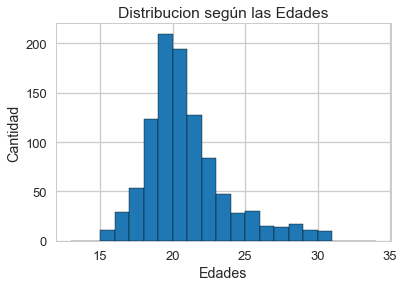

In [117]:
plt.title('Distribucion según las Edades')
plt.hist(dataset['Age'].dropna(), bins=list(range(13,35)),edgeColor= "black");
plt.ylabel("Cantidad")
plt.xlabel("Edades")


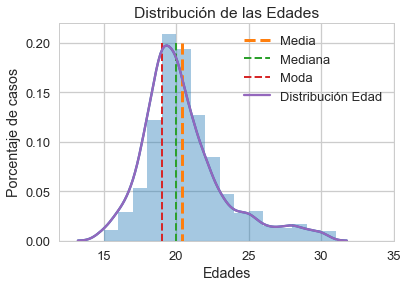

In [125]:
sb.distplot(np.array(dataset.Age.dropna()), bins=list(range(13,35))).set_title("Distribución de las Edades");
plt.ylabel("Porcentaje de casos")
plt.xlabel("Edades")
media_age = dataset['Age'].mean()
mediana_age = dataset['Age'].median()
moda_age = dataset['Age'].mode()
variacion_age = dataset['Age'].std()
plt.plot([media_age, media_age], [0.2, 0], linewidth=3, linestyle ='dashed', label = 'Media')
plt.plot([mediana_age, mediana_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Mediana')
plt.plot([moda_age, moda_age], [0.2, 0], linewidth=2, linestyle ='dashed', label = 'Moda')
sb.kdeplot(dataset['Age'].dropna(),label ='Distribución Edad')

In [24]:
tabla_pesos = np.arange(30,171.,5)
f_pesos = pd.cut(dataset['Weight'],tabla_pesos)
tabla_f_pesos = pd.value_counts(f_pesos)
print("\nDistribución de Frecuencias por Peso:")
tabla_f_pesos


Distribución de Frecuencias por Peso:


(55.0, 60.0]      169
(50.0, 55.0]      152
(60.0, 65.0]      128
(65.0, 70.0]      111
(75.0, 80.0]      105
(70.0, 75.0]       89
(45.0, 50.0]       88
(80.0, 85.0]       60
(85.0, 90.0]       37
(90.0, 95.0]       15
(95.0, 100.0]      12
(40.0, 45.0]       12
(100.0, 105.0]      3
(115.0, 120.0]      3
(110.0, 115.0]      2
(105.0, 110.0]      1
(160.0, 165.0]      1
(120.0, 125.0]      1
(145.0, 150.0]      1
(35.0, 40.0]        0
(165.0, 170.0]      0
(125.0, 130.0]      0
(130.0, 135.0]      0
(135.0, 140.0]      0
(140.0, 145.0]      0
(150.0, 155.0]      0
(155.0, 160.0]      0
(30.0, 35.0]        0
Name: Weight, dtype: int64

Text(0.5,0,'Peso')

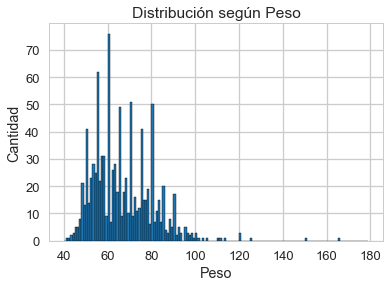

In [73]:
plt.title('Distribución según Peso')
plt.hist(dataset['Weight'].dropna(), bins=list(range(40,180)),edgeColor= "black");
plt.ylabel("Cantidad")
plt.xlabel("Peso")

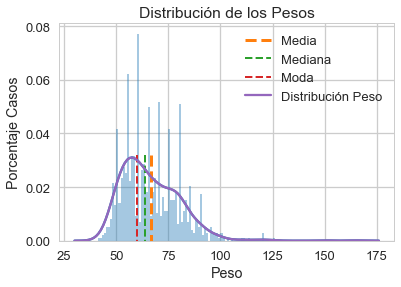

In [127]:
sb.distplot(np.array(dataset.Weight.dropna()), bins=list(range(40,130))).set_title("Distribución de los Pesos");
plt.ylabel("Porcentaje Casos")
plt.xlabel("Peso")
media_peso = dataset['Weight'].mean()
mediana_peso = dataset['Weight'].median()
moda_peso = dataset['Weight'].mode()
variacion_peso = dataset['Weight'].std()
plt.plot([media_peso, media_peso], [0.032, 0], linewidth=3, linestyle ='dashed', label = 'Media')
plt.plot([mediana_peso, mediana_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Mediana')
plt.plot([moda_peso, moda_peso], [0.032, 0], linewidth=2, linestyle ='dashed', label = 'Moda')
sb.kdeplot(dataset['Weight'].dropna(),label ='Distribución Peso')


En ambos casos observamos que la distribucion se asemeja a una desviacion normal levemente dezplazada hacia el rango inferior. Esto se debe a la muestra elegida (personas jóvenes)

<H4>Ejercicio 2: Análisis de Outliers</H4>

Los "outliers" son valores atípicos que se observan en algunas muestras. En general se deben a errores de tipeo (escribir 160 en vez de 1.60 en la altura, pensando que está expresada en centímetros en vez de en metros) o de interpretación de la pregunta.
Pero también podría darse el caso que estos valores estén indicando algo distinto, como por ejemplo que se están registrando valores de una población diferente de la muestra establecida

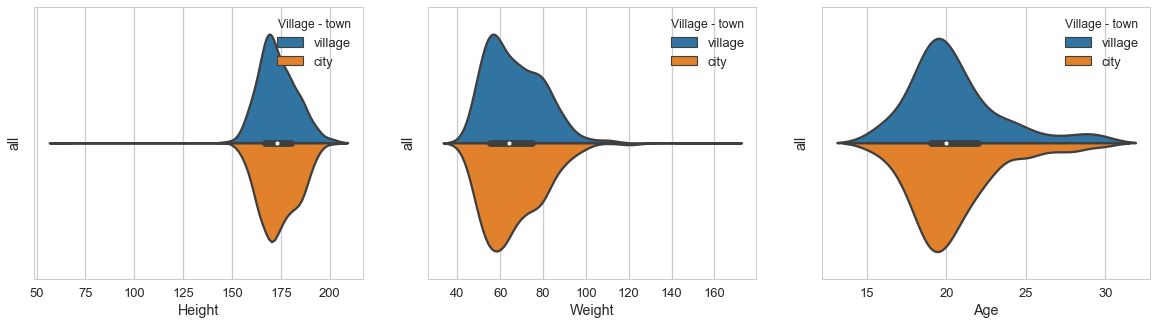

In [139]:
variables_a_analizar = 'Village - town'
vaa = {variables_a_analizar: {'city': 0, 'village': 1}}
dataset.dropna(subset=[variables_a_analizar], inplace=True)
dataset["all"] = ""

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = dataset.dropna(subset=['Height'])
_ = sb.violinplot(x='Height', y = "all", hue=variables_a_analizar, data=data, split=True, ax = ax[0])
data = dataset.dropna(subset=['Weight'])
_ = sb.violinplot(x='Weight', y = "all", hue=variables_a_analizar, data=data, split=True, ax = ax[1])
data = dataset.dropna(subset=['Age'])
_ = sb.violinplot(x='Age', y = "all", hue=variables_a_analizar, data=data, split=True, ax = ax[2])


A este análisis de los datos tal cuan vienen en la plantilla, le vamos a sacar los outlayers para ver si cambia la curva....

Límites de Outliers para Altura:
Límite superior = 199.5
Límite inferior = 147.5

Límites de Outliers para Peso:
Límite superior = 105.0
Límite inferior = 25.0

Límites de Outliers para Edad:
Límite superior = 26.5
Límite inferior = 14.5



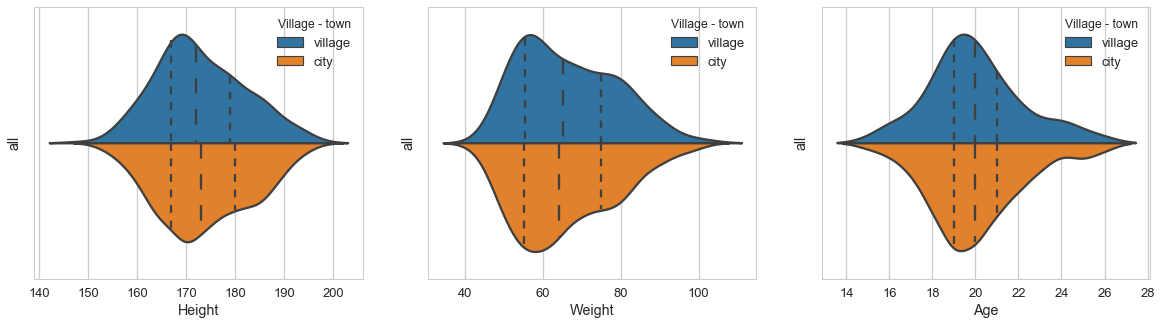

In [137]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #1er Cuartil
    q3 = df_in[col_name].quantile(0.75) #3er Cuartil
    iqr = q3-q1 #Rango intercuartilico
    fence_low  = q1-1.5*iqr #Limite inferior
    fence_high = q3+1.5*iqr #Limite superior
    print("Límite superior = "+str(fence_high))
    print("Límite inferior = "+str(fence_low)+'\n')
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] #Filtrado de outliers
    return df_out

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
altura = dataset.dropna(subset=['Height'])
print("Límites de Outliers para Altura:")
altura = remove_outlier(altura,'Height')
_ = sb.violinplot(x='Height', y = "all", hue=variables_a_analizar, data=altura, split=True, ax = ax[0],inner = 'quartile')
peso = dataset.dropna(subset=['Weight'])
print("Límites de Outliers para Peso:")
peso = remove_outlier(peso,'Weight')
_ = sb.violinplot(x='Weight', y = "all", hue=variables_a_analizar, data=peso, split=True, ax = ax[1], inner = 'quartile')
edad = dataset.dropna(subset=['Age'])
print("Límites de Outliers para Edad:")
edad = remove_outlier(edad,'Age')
_ = sb.violinplot(x='Age', y = "all", hue=variables_a_analizar, data=edad, split=True, ax = ax[2], inner = 'quartile')